In [1]:
# --- Import Required Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set display preferences
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# --- Step 1: Load All Datasets ---
order_df = pd.read_csv('order_data.csv')
customer_df = pd.read_csv('customer_data.csv')
store_df = pd.read_csv('store_data.csv')
test_df = pd.read_csv('test_data_question.csv')

# --- Step 2: Quick Info on Each ---
print("Order Data:")
print(order_df.info(), '\n')

print("Customer Data:")
print(customer_df.info(), '\n')

print("Store Data:")
print(store_df.info(), '\n')

print("Test Data:")
print(test_df.info(), '\n')


Order Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414410 entries, 0 to 1414409
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   CUSTOMER_ID            1414410 non-null  int64 
 1   STORE_NUMBER           1414410 non-null  int64 
 2   ORDER_CREATED_DATE     1414410 non-null  object
 3   ORDER_ID               1414410 non-null  int64 
 4   ORDERS                 1414410 non-null  object
 5   ORDER_CHANNEL_NAME     1414410 non-null  object
 6   ORDER_SUBCHANNEL_NAME  1414410 non-null  object
 7   ORDER_OCCASION_NAME    1414410 non-null  object
dtypes: int64(3), object(5)
memory usage: 86.3+ MB
None 

Customer Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563346 entries, 0 to 563345
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CUSTOMER_ID    563346 non-null  int64 
 1   CUSTOMER_TYPE  563319 non-

In [2]:
# Check missing values
print("Missing Values in Order Data:")
print(order_df.isnull().sum(), '\n')

print("Missing Values in Customer Data:")
print(customer_df.isnull().sum(), '\n')

print("Missing Values in Store Data:")
print(store_df.isnull().sum(), '\n')

print("Missing Values in Test Data:")
print(test_df.isnull().sum(), '\n')


Missing Values in Order Data:
CUSTOMER_ID              0
STORE_NUMBER             0
ORDER_CREATED_DATE       0
ORDER_ID                 0
ORDERS                   0
ORDER_CHANNEL_NAME       0
ORDER_SUBCHANNEL_NAME    0
ORDER_OCCASION_NAME      0
dtype: int64 

Missing Values in Customer Data:
CUSTOMER_ID       0
CUSTOMER_TYPE    27
dtype: int64 

Missing Values in Store Data:
STORE_NUMBER     0
CITY            13
STATE           14
POSTAL_CODE      2
dtype: int64 

Missing Values in Test Data:
CUSTOMER_ID              0
STORE_NUMBER             0
ORDER_ID                 0
ORDER_CHANNEL_NAME       0
ORDER_SUBCHANNEL_NAME    0
ORDER_OCCASION_NAME      0
CUSTOMER_TYPE            0
item1                    0
item2                    0
item3                    0
dtype: int64 



In [3]:
# Convert 'ORDERS' string into list (assumes comma-separated items)
order_df['ORDERS'] = order_df['ORDERS'].astype(str).str.split(',')

# Flatten all items
from collections import Counter
all_items = [item.strip() for sublist in order_df['ORDERS'] for item in sublist]
item_counts = Counter(all_items)

# Show top 20 most common items
print("Top 20 Most Frequent Items:")
for item, count in item_counts.most_common(20):
    print(f"{item}: {count}")


Top 20 Most Frequent Items:
"item_quantity": 1}: 3350053
"item_price": 0: 2845378
"item_quantity": 1}]}]}: 1200689
{"item_name": "Order Memo Paid": 901327
"item_quantity": 2}: 520735
{"orders": [{"item_details": [{"item_name": "Order Memo Paid": 425990
{"item_name": "Order Blankline 2": 304299
{"item_name": "Order Blankline 1": 304030
{"item_name": "Order Memo Item": 303904
{"item_name": "Order Memo ASAP": 276669
"item_quantity": 5}: 238524
{"item_name": "Ranch Dip - Regular": 235417
"item_price": 16.99: 225206
{"item_name": "20pc Spicy Feast Deal": 178243
"item_quantity": 2}]}]}: 135038
{"item_name": "10 pc Grilled Wings Combo": 117944
"item_price": 1.49: 111686
"item_price": 1.59: 102590
{"orders": [{"item_details": [{"item_name": "20pc Spicy Feast Deal": 89777
{"item_name": "8 pc Grilled Wings Combo": 82504


In [4]:
# Explode orders into individual rows
exploded_orders = order_df.explode('ORDERS')
exploded_orders['ORDERS'] = exploded_orders['ORDERS'].str.strip()

# Top items by store
popular_by_store = exploded_orders.groupby(['STORE_NUMBER', 'ORDERS']).size().reset_index(name='Count')
top_per_store = popular_by_store.sort_values(['STORE_NUMBER', 'Count'], ascending=[True, False])
top_items_each_store = top_per_store.groupby('STORE_NUMBER').head(3)

print("Top 3 Items per Store:")
print(top_items_each_store)


Top 3 Items per Store:
       STORE_NUMBER                   ORDERS   Count
395             266      "item_quantity": 1}   90427
0               266          "item_price": 0   85587
396             266  "item_quantity": 1}]}]}   29900
1059            400      "item_quantity": 1}   91427
631             400          "item_price": 0   82007
...             ...                      ...     ...
25745          4915          "item_price": 0  128211
26294          4915  "item_quantity": 1}]}]}   51948
26963          4970      "item_quantity": 1}   30764
26554          4970          "item_price": 0   19588
26964          4970  "item_quantity": 1}]}]}   16852

[114 rows x 3 columns]


In [5]:
# Merge customer type
merged_df = order_df.merge(customer_df, on='CUSTOMER_ID', how='left')
merged_exploded = merged_df.explode('ORDERS')
merged_exploded['ORDERS'] = merged_exploded['ORDERS'].str.strip()

popular_by_cust_type = merged_exploded.groupby(['CUSTOMER_TYPE', 'ORDERS']).size().reset_index(name='Count')
top_per_type = popular_by_cust_type.sort_values(['CUSTOMER_TYPE', 'Count'], ascending=[True, False])
top_items_each_type = top_per_type.groupby('CUSTOMER_TYPE').head(3)

print("Top 3 Items per Customer Type:")
print(top_items_each_type)


Top 3 Items per Customer Type:
        CUSTOMER_TYPE                   ORDERS    Count
332   Deleted Account      "item_quantity": 1}     2234
0     Deleted Account          "item_price": 0     2121
333   Deleted Account  "item_quantity": 1}]}]}      662
3735            Guest      "item_quantity": 1}   582460
504             Guest          "item_price": 0   479261
3736            Guest  "item_quantity": 1}]}]}   233086
4074           Online      "item_quantity": 1}        5
4068           Online          "item_price": 0        2
4075           Online  "item_quantity": 1}]}]}        2
7816       Registered      "item_quantity": 1}  2761985
4082       Registered          "item_price": 0  2361985
7817       Registered  "item_quantity": 1}]}]}   965162
8684            eClub      "item_quantity": 1}     3244
8160            eClub          "item_price": 0     1926
8685            eClub  "item_quantity": 1}]}]}     1725


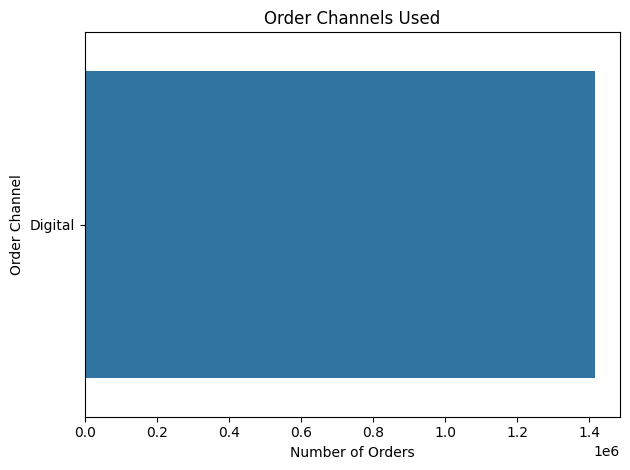

In [6]:
# Distribution of order channels
channel_counts = order_df['ORDER_CHANNEL_NAME'].value_counts()
sns.barplot(x=channel_counts.values, y=channel_counts.index)
plt.title("Order Channels Used")
plt.xlabel("Number of Orders")
plt.ylabel("Order Channel")
plt.tight_layout()
plt.show()


    Occasion                       Item    Count
0   Delivery            Order Memo Paid   199485
1   Delivery          Order Blankline 1    54235
2   Delivery          Order Blankline 2    54235
3   Delivery            Order Memo Item    54235
4   Delivery        Ranch Dip - Regular    43040
5   Delivery      20pc Spicy Feast Deal    42439
6   Delivery            Order Memo ASAP    39380
7   Delivery  10 pc Grilled Wings Combo    23484
8   Delivery   8 pc Grilled Wings Combo    15002
9   Delivery          Order Memo Future    14867
10      ToGo            Order Memo Paid  1127832
11      ToGo            Order Memo Item   301462
12      ToGo          Order Blankline 1   301439
13      ToGo          Order Blankline 2   301439
14      ToGo            Order Memo ASAP   283987
15      ToGo        Ranch Dip - Regular   260143
16      ToGo      20pc Spicy Feast Deal   225581
17      ToGo  10 pc Grilled Wings Combo   143219
18      ToGo   6 pc Grilled Wings Combo   103889
19      ToGo   8 pc 

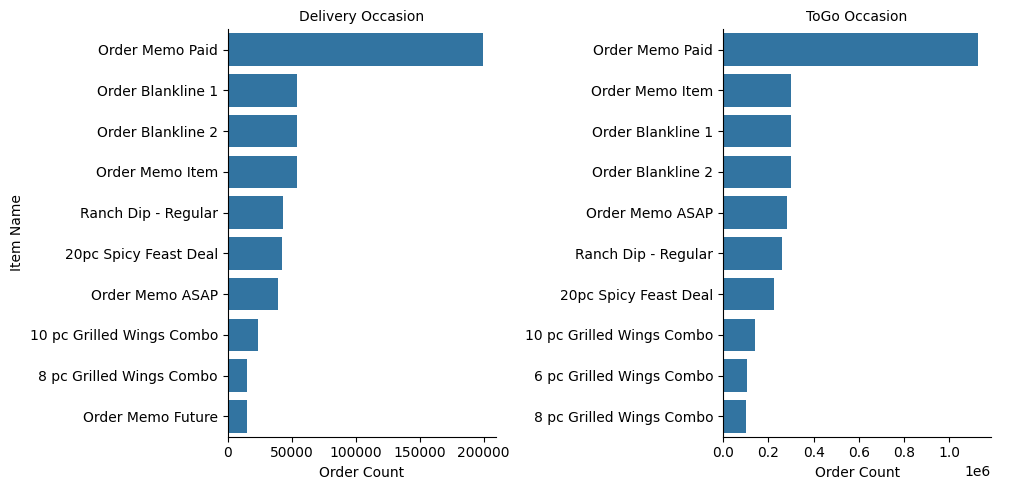

In [7]:

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("order_data.csv")

# Ensure ORDER_OCCASION_NAME is filled
df['ORDER_OCCASION_NAME'] = df['ORDER_OCCASION_NAME'].fillna('Unknown')

# Extract item names from nested JSON string
def extract_item_names(order_str):
    try:
        order_data = json.loads(order_str.replace("'", '"'))
        item_names = []
        for order in order_data.get("orders", []):
            for item in order.get("item_details", []):
                name = item.get("item_name", "")
                if name:
                    item_names.append(name)
        return item_names
    except:
        return []

df['item_names'] = df['ORDERS'].apply(extract_item_names)

# Remove rows with empty item list
df = df[df['item_names'].map(len) > 0]

# Create occasion-items mapping
occasion_items = []
for _, row in df.iterrows():
    occasion = row['ORDER_OCCASION_NAME']
    for item in row['item_names']:
        occasion_items.append((occasion, item))

occasion_df = pd.DataFrame(occasion_items, columns=['Occasion', 'Item'])

# Handle case: if still empty, avoid plotting
if occasion_df.empty:
    print("⚠ No valid occasion-item data found after cleaning.")
else:
    # Top 10 items per occasion
    top_items_per_occasion = (
        occasion_df.groupby('Occasion')['Item']
        .value_counts()
        .groupby(level=0)
        .head(10)
        .reset_index(name='Count')
    )

    print(top_items_per_occasion)

    # Plot only if we have data
    if not top_items_per_occasion.empty:
        g = sns.catplot(
            data=top_items_per_occasion,
            x='Count', y='Item',
            col='Occasion',
            kind='bar',
            col_wrap=2,
            height=5,
            sharex=False,
            sharey=False
        )
        g.set_titles("{col_name} Occasion")
        g.set_axis_labels("Order Count", "Item Name")
        plt.tight_layout()
        plt.show()


In [8]:
print(df[['item_names', 'ORDER_OCCASION_NAME']].head(5))


                                          item_names ORDER_OCCASION_NAME
0  [Order Memo Not Paid, 10 pc Grilled Wings Comb...                ToGo
1  [Ranch Dip - Regular, 50 pc Grilled Wings, Reg...                ToGo
2           [20pc Spicy Feast Deal, Order Memo Paid]                ToGo
3  [Order Memo Item, Order Memo Paid, 20 pc Grill...                ToGo
4  [Order Blankline 2, 6 pc Grilled Wings Combo, ...                ToGo


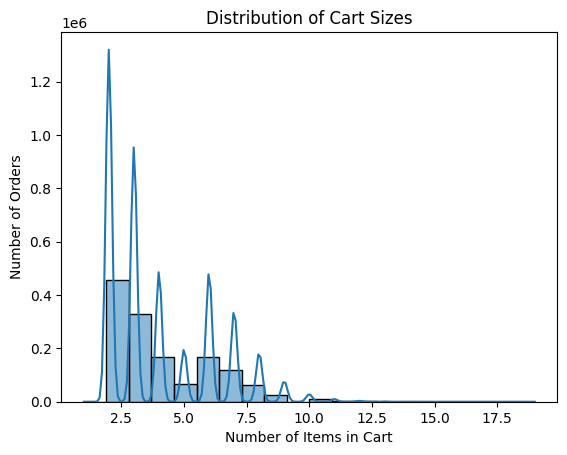

In [9]:
df['cart_size'] = df['item_names'].apply(len)

sns.histplot(df['cart_size'], bins=20, kde=True)
plt.title("Distribution of Cart Sizes")
plt.xlabel("Number of Items in Cart")
plt.ylabel("Number of Orders")
plt.show()


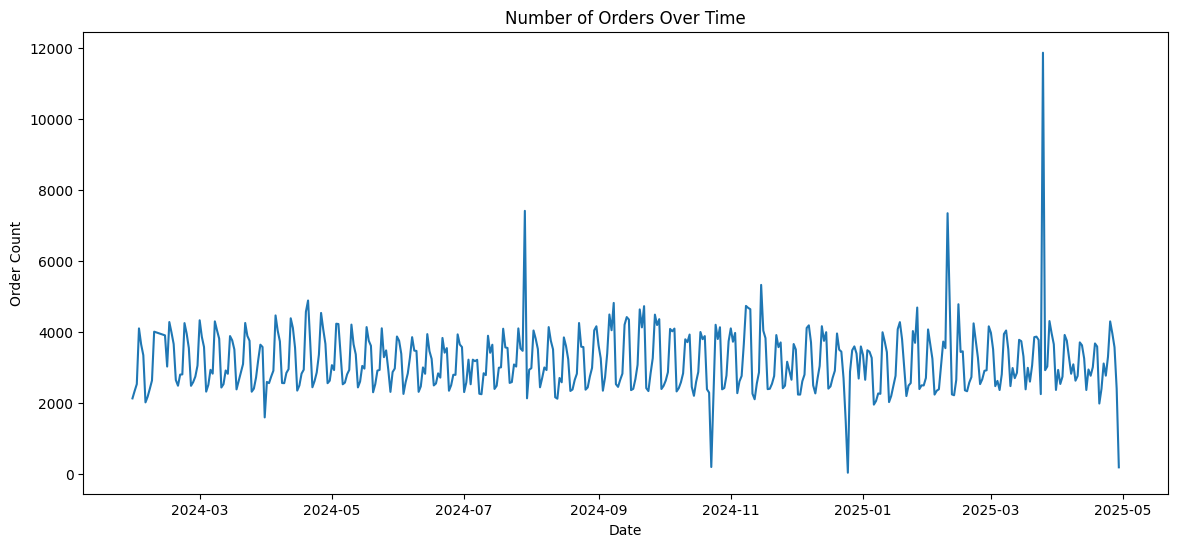

In [10]:
df['ORDER_CREATED_DATE'] = pd.to_datetime(df['ORDER_CREATED_DATE'], errors='coerce')

# Daily count
orders_over_time = df.groupby(df['ORDER_CREATED_DATE'].dt.date).size()

orders_over_time.plot(figsize=(14, 6))
plt.title("Number of Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.show()


In [11]:
repeat_counts = df['CUSTOMER_ID'].value_counts()
repeat_customers = repeat_counts[repeat_counts >= 5]

print(f"Customers with 5+ orders: {len(repeat_customers)}")


Customers with 5+ orders: 70822


In [12]:
# List of known non-food items to filter out
non_food_items = [
    "Order Memo Paid", "Order Memo Item", "Order Memo Seat", "Order Memo Tender",
    "Order Blankline 1", "Order Blankline 2", "Order Blankline 3",
    "Order Discount", "Order Tax", "Order Total", "Order Surcharge",
    "Order Change", "Order Payment", "Order Service Charge", "Order Round", "Order Note"
]

# Function to filter out non-food items from each order's item list
def filter_non_food_items(item_list):
    return [item for item in item_list if item not in non_food_items]

# Apply the filter to the item_names column
df['filtered_items'] = df['item_names'].apply(filter_non_food_items)

# Optional: check a few rows to confirm
print(df[['item_names', 'filtered_items']].head())


                                          item_names  \
0  [Order Memo Not Paid, 10 pc Grilled Wings Comb...   
1  [Ranch Dip - Regular, 50 pc Grilled Wings, Reg...   
2           [20pc Spicy Feast Deal, Order Memo Paid]   
3  [Order Memo Item, Order Memo Paid, 20 pc Grill...   
4  [Order Blankline 2, 6 pc Grilled Wings Combo, ...   

                                      filtered_items  
0  [Order Memo Not Paid, 10 pc Grilled Wings Comb...  
1  [Ranch Dip - Regular, 50 pc Grilled Wings, Reg...  
2                            [20pc Spicy Feast Deal]  
3  [20 pc Grilled Wings, Order Memo ASAP, Ranch D...  
4  [6 pc Grilled Wings Combo, 8 pc Grilled Wings ...  


In [13]:
import re

# Function to remove any item starting with "Order "
def is_food_item(item):
    return not re.match(r'^Order\s', item)

# Apply filtering
df['filtered_items'] = df['item_names'].apply(lambda items: [item for item in items if is_food_item(item)])


In [14]:
print(df[['item_names', 'filtered_items']].head())

                                          item_names  \
0  [Order Memo Not Paid, 10 pc Grilled Wings Comb...   
1  [Ranch Dip - Regular, 50 pc Grilled Wings, Reg...   
2           [20pc Spicy Feast Deal, Order Memo Paid]   
3  [Order Memo Item, Order Memo Paid, 20 pc Grill...   
4  [Order Blankline 2, 6 pc Grilled Wings Combo, ...   

                                      filtered_items  
0  [10 pc Grilled Wings Combo, 8 pc Grilled Wings...  
1  [Ranch Dip - Regular, 50 pc Grilled Wings, Reg...  
2                            [20pc Spicy Feast Deal]  
3         [20 pc Grilled Wings, Ranch Dip - Regular]  
4  [6 pc Grilled Wings Combo, 8 pc Grilled Wings ...  


In [15]:
df['filtered_items'].apply(len).describe()

count    1.414410e+06
mean     1.994085e+00
std      1.143925e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.500000e+01
Name: filtered_items, dtype: float64

In [16]:
import pandas as pd
import json

# ---------------------------
# 1. Load dataset
# ---------------------------
df = pd.read_csv("order_data.csv")

# ---------------------------
# 2. Extract food item names
# ---------------------------
def extract_item_names(order_str):
    try:
        order_data = json.loads(order_str.replace("'", '"'))
        item_names = []
        for order in order_data.get("orders", []):
            for item in order.get("item_details", []):
                name = item.get("item_name", "")
                if name:
                    item_names.append(name)
        return item_names
    except:
        return []

df['item_names'] = df['ORDERS'].apply(extract_item_names)

# ---------------------------
# 3. Filter out non-food items
# ---------------------------
non_food_keywords = [
    "Order Memo", "Blankline", "Paid", "ASAP", "Future", "Not Paid", "Item"
]

def filter_food_items(items):
    return [
        item for item in items
        if not any(keyword.lower() in item.lower() for keyword in non_food_keywords)
    ]

df['filtered_items'] = df['item_names'].apply(filter_food_items)

# ---------------------------
# 4. Popular items by store
# ---------------------------
store_items = []
for _, row in df.iterrows():
    for item in row['filtered_items']:
        store_items.append((row['STORE_NUMBER'], item))

store_df = pd.DataFrame(store_items, columns=['Store', 'Item'])

top_items_by_store = (
    store_df.groupby('Store')['Item']
    .value_counts()
    .groupby(level=0)
    .head(10)
    .reset_index(name='Count')
)

print("\nTop 10 food items by store:")
print(top_items_by_store)

# ---------------------------
# # 5. Popular items by customer type & occasion
# # ---------------------------
# cust_items = []
# for _, row in df.iterrows():
#     for item in row['filtered_items']:
#         cust_items.append((row['CUSTOMER_ID'], row['ORDER_OCCASION_NAME'], item))

# cust_df = pd.DataFrame(cust_items, columns=['Customer_ID', 'Occasion', 'Item'])

# top_items_by_cust_occ = (
#     cust_df.groupby(['Customer_ID', 'Occasion'])['Item']
#     .value_counts()
#     .groupby(level=[0, 1])
#     .head(10)
#     .reset_index(name='Count')
# )

# print("\nTop 10 food items by Customer Type & Occasion:")
# print(top_items_by_cust_occ)
# ---------------------------
# Popular items by customer (CUSTOMER_ID) & occasion
# ---------------------------
cust_items = []
for _, row in df.iterrows():
    for item in row['filtered_items']:
        cust_items.append((row['CUSTOMER_ID'], row['ORDER_OCCASION_NAME'], item))

cust_df = pd.DataFrame(cust_items, columns=['Customer_ID', 'Occasion', 'Item'])

top_items_by_cust_occ = (
    cust_df.groupby(['Customer_ID', 'Occasion'])['Item']
    .value_counts()
    .groupby(level=[0, 1])
    .head(10)
    .reset_index(name='Count')
)

print("\nTop 10 food items by Customer ID & Occasion:")
print(top_items_by_cust_occ)




Top 10 food items by store:
     Store                       Item  Count
0      266        Ranch Dip - Regular   8275
1      266   6 pc Grilled Wings Combo   5366
2      266  10 pc Grilled Wings Combo   5319
3      266   8 pc Grilled Wings Combo   4611
4      266      20pc Spicy Feast Deal   3577
..     ...                        ...    ...
375   4970      Regular Buffalo Fries   1156
376   4970          Ranch Dip - Large   1109
377   4970   6 pc Grilled Wings Combo   1015
378   4970   8 pc Grilled Wings Combo    997
379   4970     6 pc Spicy Wings Combo    989

[380 rows x 3 columns]

Top 10 food items by Customer ID & Occasion:
         Customer_ID  Occasion                       Item  Count
0               1588      ToGo      20pc Spicy Feast Deal      2
1               1588      ToGo                 32 Oz Soda      2
2               1588      ToGo    10 pc Spicy Wings Combo      1
3               1588      ToGo          15 pc Spicy Wings      1
4               2475  Delivery      

In [17]:
print(df.columns.tolist())


['CUSTOMER_ID', 'STORE_NUMBER', 'ORDER_CREATED_DATE', 'ORDER_ID', 'ORDERS', 'ORDER_CHANNEL_NAME', 'ORDER_SUBCHANNEL_NAME', 'ORDER_OCCASION_NAME', 'item_names', 'filtered_items']


In [21]:
# Requirements: pandas, numpy, scipy
import pandas as pd
import numpy as np
import json
from datetime import datetime
from scipy.stats import zscore

# --- 0. Load data ---
df = pd.read_csv("order_data.csv")  # change path if needed

# --- 1. Robust parser: extract items, qty, price, order_total ---
def parse_order(order_str):
    """
    Returns:
      - items: list of item_name strings
      - details: list of dicts with keys: item_name, item_price (float or None), item_quantity (int or None)
      - order_total: sum(item_price * qty if available) or None
    """
    items = []
    details = []
    total = 0.0
    price_found = False
    try:
        obj = json.loads(order_str.replace("'", '"'))
        for order in obj.get("orders", []):
            for it in order.get("item_details", []):
                name = it.get("item_name", None)
                # try multiple keys if possible
                price = None
                qty = None
                # Many JSONs have keys like 'item_price' and 'item_quantity' or numeric strings
                if isinstance(it, dict):
                    # normalize keys
                    if 'item_price' in it:
                        try:
                            price = float(it.get('item_price'))
                        except:
                            price = None
                    else:
                        # search for numeric-looking keys
                        for k,v in it.items():
                            if 'price' in str(k).lower():
                                try:
                                    price = float(v)
                                except:
                                    price = None
                    if 'item_quantity' in it:
                        try:
                            qty = int(it.get('item_quantity'))
                        except:
                            qty = None
                    else:
                        # fallback
                        for k,v in it.items():
                            if 'quantity' in str(k).lower() or 'qty' in str(k).lower():
                                try:
                                    qty = int(v)
                                except:
                                    qty = None
                if name:
                    items.append(name)
                    details.append({'item_name': name, 'item_price': price, 'item_quantity': qty})
                    if price is not None:
                        price_found = True
                        if qty is None:
                            total += price
                        else:
                            total += price * (qty if qty>0 else 1)
    except Exception as e:
        # malformed JSON — return empties
        return [], [], None
    order_total = total if price_found else None
    return items, details, order_total

# Apply parsing with vectorized-ish approach (apply)
parsed = df['ORDERS'].apply(parse_order)
df['item_names_parsed'] = parsed.apply(lambda x: x[0])
df['item_details_parsed'] = parsed.apply(lambda x: x[1])
df['order_total'] = parsed.apply(lambda x: x[2])

# --- 2. Filter non-food items (more robust) ---
import re
non_food_pattern = re.compile(r'^\s*order\s|memo|blankline|paid|asap|future|note', flags=re.IGNORECASE)

def keep_food(items):
    return [it for it in items if not non_food_pattern.search(it)]

df['filtered_items'] = df['item_names_parsed'].apply(keep_food)

# If order_total is None, we can estimate it via avg item price later or leave as NaN.

# --- 3. Temporal features from ORDER_CREATED_DATE ---
df['ORDER_CREATED_DATE'] = pd.to_datetime(df['ORDER_CREATED_DATE'], errors='coerce')
# drop rows with no date if necessary
df = df[~df['ORDER_CREATED_DATE'].isna()].copy()

df['order_date'] = df['ORDER_CREATED_DATE'].dt.date
df['order_dt'] = df['ORDER_CREATED_DATE']  # keep timestamp
df['order_hour'] = df['ORDER_CREATED_DATE'].dt.hour
df['weekday'] = df['ORDER_CREATED_DATE'].dt.day_name()
df['is_weekend'] = df['order_hour'].apply(lambda h: False)  # placeholder
# define weekend as Sat/Sun
df['is_weekend'] = df['ORDER_CREATED_DATE'].dt.dayofweek.isin([5,6])

# hour buckets (you can change boundaries)
def hour_bucket(h):
    if h < 6:
        return 'LateNight(0-5)'
    elif h < 11:
        return 'Morning(6-10)'
    elif h < 15:
        return 'Midday(11-14)'
    elif h < 18:
        return 'Afternoon(15-17)'
    elif h < 22:
        return 'Evening(18-21)'
    else:
        return 'LateEvening(22-23)'

df['hour_bucket'] = df['order_hour'].apply(hour_bucket)
df['month'] = df['ORDER_CREATED_DATE'].dt.month
df['week_of_year'] = df['ORDER_CREATED_DATE'].dt.isocalendar().week

# --- 4. Daily counts and detect seasonal spikes ---
daily_counts = df.groupby('order_date').size().rename('order_count').reset_index()
daily_counts['order_count_z'] = zscore(daily_counts['order_count'].fillna(0))
# mark spikes where z > 3 (tunable)
daily_counts['is_spike'] = daily_counts['order_count_z'] > 3
spike_dates = daily_counts.loc[daily_counts['is_spike'], 'order_date'].tolist()

print(f"Detected spike dates (z>3): {spike_dates[:10]} (total {len(spike_dates)})")

# Merge daily counts back to df if needed
df = df.merge(daily_counts[['order_date','order_count','order_count_z','is_spike']], on='order_date', how='left')

# --- 5. Store-level time analysis (aggregations) ---
# Top items per store (already computed earlier), now weekday vs weekend counts by store
store_weekday = df.explode('filtered_items').dropna(subset=['filtered_items'])
store_weekday = store_weekday.groupby(['STORE_NUMBER','weekday','is_weekend','filtered_items']).size().reset_index(name='count')
# For convenience, top 5 by store x weekday:
top5_store_weekday = store_weekday.sort_values(['STORE_NUMBER','weekday','count'], ascending=[True,True,False]).groupby(['STORE_NUMBER','weekday']).head(5)
# time-of-day popularity per store
store_hour = df.explode('filtered_items').groupby(['STORE_NUMBER','hour_bucket','filtered_items']).size().reset_index(name='count')
top3_store_hour = store_hour.sort_values(['STORE_NUMBER','hour_bucket','count'], ascending=[True,True,False]).groupby(['STORE_NUMBER','hour_bucket']).head(3)

# --- 6. Customer-level feature engineering ---
# For customers we compute: order_count, first_order, last_order, recency_days, total_spent (if available), avg_order_value, avg_cart_size, is_returning

# order_count & first/last order
cust_agg = df.groupby('CUSTOMER_ID').agg(
    order_count = ('ORDER_ID','nunique'),
    first_order = ('ORDER_CREATED_DATE','min'),
    last_order = ('ORDER_CREATED_DATE','max')
).reset_index()

# recency relative to dataset last date
max_date = df['ORDER_CREATED_DATE'].max()
cust_agg['recency_days'] = (max_date - cust_agg['last_order']).dt.days

# frequency: orders per active days (active days = last - first + 1 to avoid div by zero)
cust_agg['active_days'] = (cust_agg['last_order'] - cust_agg['first_order']).dt.days + 1
cust_agg['active_days'] = cust_agg['active_days'].replace(0,1)
cust_agg['frequency'] = cust_agg['order_count'] / cust_agg['active_days']

# avg_cart_size and total_spent, avg_order_value
# avg_cart_size = mean length of filtered_items per order for that customer
cart_sizes = df[['CUSTOMER_ID','filtered_items']].copy()
cart_sizes['cart_size'] = cart_sizes['filtered_items'].apply(lambda x: len(x) if isinstance(x, list) else 0)
cust_cart = cart_sizes.groupby('CUSTOMER_ID')['cart_size'].agg(['mean','median','max']).reset_index().rename(columns={'mean':'avg_cart_size','median':'median_cart_size','max':'max_cart_size'})

cust_agg = cust_agg.merge(cust_cart, on='CUSTOMER_ID', how='left')

# total_spent & avg_order_value
# If df.order_total is NaN for many rows, we compute total_spent from available rows and also estimate using item-level prices if present
cust_spend = df.groupby('CUSTOMER_ID').agg(
    total_spent = ('order_total', lambda x: x.dropna().sum()),
    orders_with_price = ('order_total', lambda x: x.dropna().shape[0])
).reset_index()

cust_agg = cust_agg.merge(cust_spend, on='CUSTOMER_ID', how='left')
cust_agg['avg_order_value'] = cust_agg.apply(lambda r: (r['total_spent']/r['orders_with_price']) if r['orders_with_price']>0 else np.nan, axis=1)

# is_returning
cust_agg['is_returning'] = cust_agg['order_count'] > 1

# high value customers: top 5% by total_spent (only among those with spend info)
threshold = cust_agg['total_spent'].dropna().quantile(0.95)
cust_agg['is_high_value'] = cust_agg['total_spent'].apply(lambda x: True if (pd.notna(x) and x >= threshold) else False)

# fill na values sensibly
cust_agg[['avg_cart_size','median_cart_size','max_cart_size']] = cust_agg[['avg_cart_size','median_cart_size','max_cart_size']].fillna(0)
cust_agg[['total_spent','orders_with_price','avg_order_value']] = cust_agg[['total_spent','orders_with_price','avg_order_value']].fillna(0)

# --- 7. Save or preview features ---
cust_agg.to_csv("customer_features.csv", index=False)
daily_counts.to_csv("daily_order_counts.csv", index=False)
top5_store_weekday.to_csv("top5_store_weekday.csv", index=False)
top3_store_hour.to_csv("top3_store_hour.csv", index=False)

print("Customer features saved -> customer_features.csv")
print("Daily counts saved -> daily_order_counts.csv")
print("Top items per store-weekday -> top5_store_weekday.csv")
print("Top items per store-hourbucket -> top3_store_hour.csv")


Detected spike dates (z>3): [datetime.date(2024, 7, 29), datetime.date(2025, 2, 9), datetime.date(2025, 3, 25)] (total 3)
Customer features saved -> customer_features.csv
Daily counts saved -> daily_order_counts.csv
Top items per store-weekday -> top5_store_weekday.csv
Top items per store-hourbucket -> top3_store_hour.csv


=== customer_features ===
Rows, Columns: (563346, 15)
Columns: ['CUSTOMER_ID', 'order_count', 'first_order', 'last_order', 'recency_days', 'active_days', 'frequency', 'avg_cart_size', 'median_cart_size', 'max_cart_size', 'total_spent', 'orders_with_price', 'avg_order_value', 'is_returning', 'is_high_value']

Top 5 rows:
   CUSTOMER_ID  order_count first_order  last_order  recency_days  \
0         1588            4  2024-02-20  2024-04-26           368   
1         2475            2  2024-04-15  2025-03-14            46   
2         4769            1  2024-06-15  2024-06-15           318   
3         5791            1  2024-08-07  2024-08-07           265   
4         6524            3  2024-06-11  2025-02-26            62   

   active_days  frequency  avg_cart_size  median_cart_size  max_cart_size  \
0           67   0.059701            1.5               1.5              2   
1          334   0.005988            3.0               3.0              5   
2            1   1.000000       

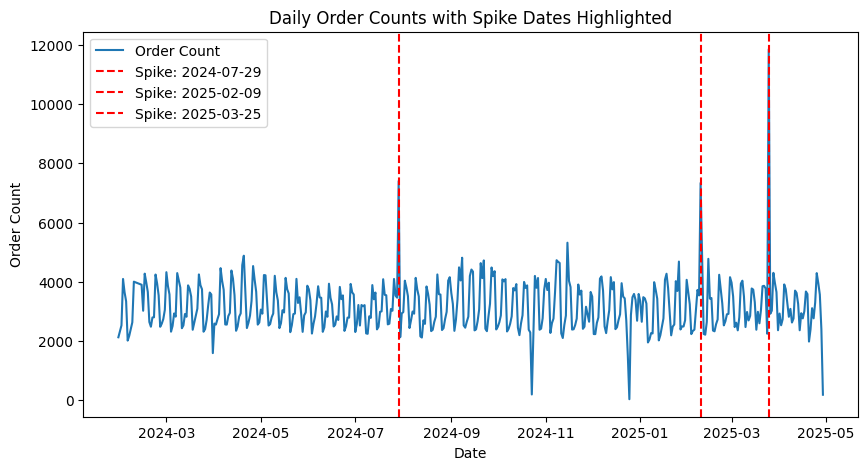

In [22]:
import pandas as pd

# Files ke paths yahaan update karen
files = {
    "customer_features": "customer_features.csv",
    "daily_order_counts": "daily_order_counts.csv",
    "top5_store_weekday": "top5_store_weekday.csv",
    "top3_store_hour": "top3_store_hour.csv"
}

def basic_info(df, name):
    print(f"=== {name} ===")
    print("Rows, Columns:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nTop 5 rows:")
    print(df.head())
    print("\nBottom 5 rows:")
    print(df.tail())
    print("\n")

# Load and summarize all files
for name, path in files.items():
    df = pd.read_csv(path)
    basic_info(df, name)

# --- Example: Distribution check for top3_store_hour ---
df_hour = pd.read_csv(files["top3_store_hour"])
print("Top 10 stores by total count:")
print(df_hour.groupby("STORE_NUMBER")["count"].sum().sort_values(ascending=False).head(10))

# --- Example: Count distribution by weekday for top5_store_weekday ---
df_weekday = pd.read_csv(files["top5_store_weekday"])
print("\nOrder counts by weekday:")
print(df_weekday.groupby("weekday")["count"].sum().sort_values(ascending=False))

# --- Example: Check orders on spike dates ---
df_daily = pd.read_csv(files["daily_order_counts"])
spike_dates = ["2024-07-29", "2025-02-09", "2025-03-25"]

print("\nOrders on spike dates:")
print(df_daily[df_daily["order_date"].isin(spike_dates)][["order_date", "order_count", "is_spike"]])

# --- Optional: Plotting spike dates counts (requires matplotlib) ---
try:
    import matplotlib.pyplot as plt

    df_daily["order_date"] = pd.to_datetime(df_daily["order_date"])
    plt.figure(figsize=(10,5))
    plt.plot(df_daily["order_date"], df_daily["order_count"], label="Order Count")
    for d in spike_dates:
        plt.axvline(pd.to_datetime(d), color='red', linestyle='--', label=f'Spike: {d}')
    plt.xlabel("Date")
    plt.ylabel("Order Count")
    plt.title("Daily Order Counts with Spike Dates Highlighted")
    plt.legend()
    plt.show()

except ImportError:
    print("matplotlib not installed. Skipping plot.")



In [18]:
# Step2_deeper_analysis.py
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set(style="whitegrid", palette="muted")

# ---------- 0. Paths (update if needed) ----------
ORDER_PATH = "order_data.csv"
CUSTOMER_FEATURES_PATH = "customer_features.csv"
DAILY_COUNTS_PATH = "daily_order_counts.csv"
OUT_PREFIX = "step2_output"

# ---------- 1. Helper: parse orders and filter memos ----------
non_food_pattern = re.compile(r'^\s*order\s|memo|blankline|paid|asap|future|note', flags=re.IGNORECASE)

def parse_order_items(order_str):
    """Return list of item names (raw), robust to malformed JSON."""
    items = []
    try:
        obj = json.loads(order_str.replace("'", '"'))
        for order in obj.get("orders", []):
            for it in order.get("item_details", []):
                # item_name could be nested or key names vary
                if isinstance(it, dict):
                    name = it.get("item_name") or it.get("name") or None
                    if name:
                        items.append(name.strip())
    except Exception:
        # fallback: try to find "item_name":"..." substrings
        try:
            matches = re.findall(r'"item_name"\s*:\s*"([^"]+)"', order_str)
            items = [m.strip() for m in matches]
        except:
            items = []
    return items

def filter_food(items):
    return [it for it in items if not non_food_pattern.search(it)]

# ---------- 2. Load order_data and parse items & temporal features ----------
print("Loading order_data...")
orders = pd.read_csv(ORDER_PATH)

# parse items (if you already have filtered_items stored elsewhere, skip parsing)
print("Parsing ORDERS -> items (this may take a while)...")
orders['item_names_raw'] = orders['ORDERS'].apply(parse_order_items)
orders['filtered_items'] = orders['item_names_raw'].apply(filter_food)

# temporal features
orders['ORDER_CREATED_DATE'] = pd.to_datetime(orders['ORDER_CREATED_DATE'], errors='coerce')
orders = orders[~orders['ORDER_CREATED_DATE'].isna()].copy()
orders['order_date'] = orders['ORDER_CREATED_DATE'].dt.date
orders['weekday'] = orders['ORDER_CREATED_DATE'].dt.day_name()
orders['is_weekend'] = orders['ORDER_CREATED_DATE'].dt.dayofweek.isin([5,6])
orders['order_hour'] = orders['ORDER_CREATED_DATE'].dt.hour

def hour_bucket(h):
    if pd.isna(h):
        return "Unknown"
    h = int(h)
    if h < 6:
        return "LateNight(0-5)"
    if h < 11:
        return "Morning(6-10)"
    if h < 15:
        return "Midday(11-14)"
    if h < 18:
        return "Afternoon(15-17)"
    if h < 22:
        return "Evening(18-21)"
    return "LateEvening(22-23)"

orders['hour_bucket'] = orders['order_hour'].apply(hour_bucket)

# ---------- 3. Load customer features (segmentation) ----------
cust_feat = pd.read_csv(CUSTOMER_FEATURES_PATH)
# ensure types
cust_feat['CUSTOMER_ID'] = cust_feat['CUSTOMER_ID'].astype(orders['CUSTOMER_ID'].dtype)

# merge customer flags into orders
orders = orders.merge(cust_feat[['CUSTOMER_ID','order_count','is_returning','is_high_value','avg_cart_size']],
                      on='CUSTOMER_ID', how='left')

# ---------- 4. Store-level trends ----------
# 4.1 Weekday vs Weekend volumes per store
store_weekday = orders.groupby(['STORE_NUMBER','weekday','is_weekend']).size().reset_index(name='order_count')
store_weekday.to_csv(f"{OUT_PREFIX}_store_weekday_counts.csv", index=False)

# Plot sample: top 6 stores by total volume
top_stores = orders['STORE_NUMBER'].value_counts().head(6).index.tolist()
fig, axs = plt.subplots(3, 2, figsize=(14,12), sharey=False)
axs = axs.flatten()
for i, store in enumerate(top_stores):
    tmp = store_weekday[store_weekday['STORE_NUMBER']==store]
    sns.barplot(data=tmp.sort_values('weekday', key=lambda x: x.map(
        {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})),
                x='order_count', y='weekday', hue='is_weekend', ax=axs[i])
    axs[i].set_title(f"Store {store} - weekday counts")
plt.tight_layout()
plt.savefig(f"{OUT_PREFIX}_top6_store_weekday.png")
plt.close()

# 4.2 Hour-of-day popularity per store (top items)
store_hour_item = orders.explode('filtered_items').dropna(subset=['filtered_items'])
store_hour_item = store_hour_item.groupby(['STORE_NUMBER','hour_bucket','filtered_items']).size().reset_index(name='count')
store_hour_item.to_csv(f"{OUT_PREFIX}_store_hour_item_counts.csv", index=False)

# For a sample store plot (first top store)
s0 = top_stores[0]
s0_df = store_hour_item[store_hour_item['STORE_NUMBER']==s0].groupby(['hour_bucket','filtered_items'])['count'].sum().reset_index()
# plot top 10 items across hour_buckets for store s0
top_items_s0 = s0_df.groupby('filtered_items')['count'].sum().nlargest(10).index.tolist()
s0_plot_df = s0_df[s0_df['filtered_items'].isin(top_items_s0)]
plt.figure(figsize=(10,6))
sns.barplot(data=s0_plot_df, x='hour_bucket', y='count', hue='filtered_items')
plt.title(f"Store {s0}: Top items by hour_bucket")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.savefig(f"{OUT_PREFIX}_store_{s0}_hour_item.png")
plt.close()

# ---------- 5. Seasonal spikes: analyze spike dates from daily counts ----------
daily = pd.read_csv(DAILY_COUNTS_PATH)
# ensure types
daily['order_date'] = pd.to_datetime(daily['order_date']).dt.date
spike_dates = daily.loc[daily['is_spike'] == True, 'order_date'].tolist()
print("Spike dates:", spike_dates)

# For each spike date: top stores and top items
spike_summary = []
for sd in spike_dates:
    day_orders = orders[orders['order_date']==sd]
    top_stores_day = day_orders['STORE_NUMBER'].value_counts().head(10)
    top_items_day = day_orders.explode('filtered_items')['filtered_items'].value_counts().head(20)
    spike_summary.append({
        'date': sd,
        'total_orders': day_orders.shape[0],
        'top_stores': top_stores_day.to_dict(),
        'top_items': top_items_day.to_dict()
    })
# save spike summary in JSON-like CSV
spike_out = []
for s in spike_summary:
    for k,v in s['top_stores'].items():
        spike_out.append({'date': s['date'], 'type':'store', 'key':k, 'count':v})
    for k,v in s['top_items'].items():
        spike_out.append({'date': s['date'], 'type':'item', 'key':k, 'count':v})
spike_df = pd.DataFrame(spike_out)
spike_df.to_csv(f"{OUT_PREFIX}_spike_summary.csv", index=False)

# ---------- 6. Customer-segmentation item preference ----------
# is_returning True/False, is_high_value True/False
# compute top items per segment
orders_expl = orders.explode('filtered_items').dropna(subset=['filtered_items'])
# by returning
ret_pref = orders_expl.groupby(['is_returning','filtered_items']).size().reset_index(name='count')
ret_pref = ret_pref.sort_values(['is_returning','count'], ascending=[False,False])
ret_pref.to_csv(f"{OUT_PREFIX}_returning_pref.csv", index=False)

# by high value
hv_pref = orders_expl.groupby(['is_high_value','filtered_items']).size().reset_index(name='count')
hv_pref = hv_pref.sort_values(['is_high_value','count'], ascending=[False,False])
hv_pref.to_csv(f"{OUT_PREFIX}_highvalue_pref.csv", index=False)

# For top N comparison, pivot small tables for quick view
topN = 15
ret_top = (ret_pref.groupby('is_returning')
           .apply(lambda g: g.nlargest(topN, 'count')[['filtered_items','count']].reset_index(drop=True))
           .reset_index(level=0))
ret_top.to_csv(f"{OUT_PREFIX}_returning_topN.csv", index=False)

hv_top = (hv_pref.groupby('is_high_value')
           .apply(lambda g: g.nlargest(topN, 'count')[['filtered_items','count']].reset_index(drop=True))
           .reset_index(level=0))
hv_top.to_csv(f"{OUT_PREFIX}_highvalue_topN.csv", index=False)

# Plot sample: top 10 items for returning vs new
ret_plot = ret_pref.groupby('filtered_items')['count'].sum().nlargest(20).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=ret_plot, x='count', y='filtered_items')
plt.title("Top items overall (sample)")
plt.tight_layout()
plt.savefig(f"{OUT_PREFIX}_top_items_overall.png")
plt.close()

# ---------- 7. Occasion-level analysis (Delivery vs ToGo) ----------
occ_pref = orders_expl.groupby(['ORDER_OCCASION_NAME','filtered_items']).size().reset_index(name='count')
occ_pref = occ_pref.sort_values(['ORDER_OCCASION_NAME','count'], ascending=[True,False])
occ_pref.to_csv(f"{OUT_PREFIX}_occasion_pref.csv", index=False)

# Example plot: top items in Delivery vs ToGo (top 15 combined)
top_items_combined = orders_expl['filtered_items'].value_counts().nlargest(15).index.tolist()
plot_df = occ_pref[occ_pref['filtered_items'].isin(top_items_combined)]
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x='count', y='filtered_items', hue='ORDER_OCCASION_NAME')
plt.title("Delivery vs ToGo - Top 15 items")
plt.tight_layout()
plt.savefig(f"{OUT_PREFIX}_delivery_vs_togo_top15.png")
plt.close()

# ---------- 8. Save key aggregated files ----------
store_weekday.to_csv(f"{OUT_PREFIX}_store_weekday.csv", index=False)
store_hour_item.to_csv(f"{OUT_PREFIX}_store_hour_item.csv", index=False)
orders_expl.head(0).to_csv(f"{OUT_PREFIX}_orders_expl_schema.csv", index=False)  # placeholder

print("Step2 analysis completed. Outputs saved with prefix:", OUT_PREFIX)
print("Generated files examples:", [
    f"{OUT_PREFIX}_store_weekday.csv",
    f"{OUT_PREFIX}_store_hour_item.csv",
    f"{OUT_PREFIX}_spike_summary.csv",
    f"{OUT_PREFIX}_returning_topN.csv",
    f"{OUT_PREFIX}_highvalue_topN.csv",
    f"{OUT_PREFIX}_occasion_pref.csv"
])


Loading order_data...
Parsing ORDERS -> items (this may take a while)...
Spike dates: [datetime.date(2024, 7, 29), datetime.date(2025, 2, 9), datetime.date(2025, 3, 25)]


C:\Users\m5cd2\AppData\Local\Temp\ipykernel_37288\2532947277.py:174: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(topN, 'count')[['filtered_items','count']].reset_index(drop=True))
C:\Users\m5cd2\AppData\Local\Temp\ipykernel_37288\2532947277.py:179: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(topN, 'count')[['filtered_items','count']].reset_index(dr

Step2 analysis completed. Outputs saved with prefix: step2_output
Generated files examples: ['step2_output_store_weekday.csv', 'step2_output_store_hour_item.csv', 'step2_output_spike_summary.csv', 'step2_output_returning_topN.csv', 'step2_output_highvalue_topN.csv', 'step2_output_occasion_pref.csv']


In [23]:
import pandas as pd
import os

def load_csv(filename):
    if os.path.exists(filename):
        return pd.read_csv(filename)
    else:
        print(f" File not found: {filename}")
        return None

def print_top(df, group_col, value_col, top_n=5, title=""):
    if df is not None:
        print(f"\n {title}")
        print(df.groupby(group_col)[value_col].sum().sort_values(ascending=False).head(top_n))
    else:
        print(f" No data for {title}")

# --- Load all step 2 outputs ---
hv_pref = load_csv("step2_output_highvalue_pref.csv")
hv_topn = load_csv("step2_output_highvalue_topN.csv")
ret_pref = load_csv("step2_output_returning_pref.csv")
ret_topn = load_csv("step2_output_returning_topN.csv")
occasion = load_csv("step2_output_occasion_pref.csv")
store_weekday = load_csv("step2_output_store_weekday.csv")
store_hours = load_csv("step2_output_store_hour_item.csv")
spike_summary = load_csv("step2_output_spike_summary.csv")

# --- High-Value vs Low-Value ---
print_top(hv_pref, "filtered_items", "count", 5, "High-Value Customer Top Items")
print_top(hv_topn, "filtered_items", "count", 5, "Low-Value Customer Top Items")

# --- Returning vs New ---
print_top(ret_pref, "filtered_items", "count", 5, "Returning Customer Top Items")
print_top(ret_topn, "filtered_items", "count", 5, "New Customer Top Items")

# --- Occasion Trends ---
if occasion is not None:
    print("\nOccasion Trends (Top 5 items per occasion)")
    for occ in occasion["ORDER_OCCASION_NAME"].unique():
        print(f"\n--- {occ} ---")
        print(
            occasion[occasion["ORDER_OCCASION_NAME"] == occ]
            .groupby("filtered_items")["count"]
            .sum()
            .sort_values(ascending=False)
            .head(5)
        )

# --- Store-Level Weekday Patterns ---
if store_weekday is not None:
    print("\n Store-Level Weekday Peaks")
    peak_days = store_weekday.groupby("STORE_NUMBER").apply(lambda x: x.sort_values("order_count", ascending=False).head(1))
    print(peak_days[["STORE_NUMBER", "weekday", "order_count"]])

# --- Store-Level Hour-of-Day ---
if store_hours is not None:
    print("\nLate Night Popular Items (0-5 hrs)")
    late_night = store_hours[store_hours["hour_bucket"].str.contains("LateNight", na=False)]
    print(late_night.groupby("filtered_items")["count"].sum().sort_values(ascending=False).head(5))

# --- Spike Days ---
if spike_summary is not None:
    print("\n Spike Day Leaders")
    top_spikes = spike_summary.groupby(["date", "type", "key"])["count"].sum().reset_index()
    for date in top_spikes["date"].unique():
        print(f"\n--- {date} ---")
        print(top_spikes[top_spikes["date"] == date].sort_values("count", ascending=False).head(5))

print("\n Step 2 Summary Generated.")



📌 High-Value Customer Top Items
filtered_items
Ranch Dip - Regular          303183
20pc Spicy Feast Deal        268020
10 pc Grilled Wings Combo    166703
6 pc Grilled Wings Combo     117924
8 pc Grilled Wings Combo     117620
Name: count, dtype: int64

📌 Low-Value Customer Top Items
filtered_items
Ranch Dip - Regular          303183
20pc Spicy Feast Deal        268020
10 pc Grilled Wings Combo    166703
6 pc Grilled Wings Combo     117924
8 pc Grilled Wings Combo     117620
Name: count, dtype: int64

📌 Returning Customer Top Items
filtered_items
Ranch Dip - Regular          303183
20pc Spicy Feast Deal        268020
10 pc Grilled Wings Combo    166703
6 pc Grilled Wings Combo     117924
8 pc Grilled Wings Combo     117620
Name: count, dtype: int64

📌 New Customer Top Items
filtered_items
Ranch Dip - Regular          303183
20pc Spicy Feast Deal        268020
10 pc Grilled Wings Combo    166703
6 pc Grilled Wings Combo     117924
8 pc Grilled Wings Combo     117620
Name: count, dtype:

C:\Users\m5cd2\AppData\Local\Temp\ipykernel_37288\1026493814.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  peak_days = store_weekday.groupby("STORE_NUMBER").apply(lambda x: x.sort_values("order_count", ascending=False).head(1))


In [42]:
import pandas as pd
from functools import reduce

def load_aggregate(path, rename_map, possible_keys=('filtered_items', 'key')):
    """Load CSV, find join key, rename columns, aggregate by join key."""
    try:
        df = pd.read_csv(path)
    except FileNotFoundError:
        print(f" Missing file: {path}")
        return pd.DataFrame()

    # Detect join key
    join_key = None
    for k in possible_keys:
        if k in df.columns:
            join_key = k
            break
    if join_key is None:
        print(f" No join key found in {path}")
        return pd.DataFrame()

    # Standardize key name
    df = df.rename(columns={join_key: 'filtered_items'})

    # Apply renaming of count column
    df = df.rename(columns=rename_map)

    # Keep only the relevant columns
    keep_cols = ['filtered_items'] + list(rename_map.values())
    df = df[keep_cols]

    # Aggregate if multiple rows per item
    agg_dict = {col: 'sum' for col in rename_map.values()}
    df = df.groupby('filtered_items', as_index=False).agg(agg_dict)

    return df

# Load all step2 feature CSVs
dfs = [
    load_aggregate("step2_output_highvalue_pref.csv", {'count': 'highvalue_pref_count'}),
    load_aggregate("step2_output_highvalue_topN.csv", {'count': 'highvalue_topN_count'}),
    load_aggregate("step2_output_occasion_pref.csv", {'count': 'occasion_count'}),
    load_aggregate("step2_output_returning_pref.csv", {'count': 'returning_pref_count'}),
    load_aggregate("step2_output_returning_topN.csv", {'count': 'returning_topN_count'}),
    load_aggregate("step2_output_spike_summary.csv", {'count': 'spike_count'}),  # will use 'key' if needed
    load_aggregate("step2_output_store_hour_item_counts.csv", {'count': 'store_hours_item_count'}),
    load_aggregate("step2_output_store_hour_item.csv", {'count': 'store_hours_count'}),
]

# Remove any empty/invalid DataFrames
dfs = [df for df in dfs if not df.empty]

# Merge all DataFrames
df_all = reduce(lambda left, right: pd.merge(left, right, on='filtered_items', how='outer'), dfs)

# Fill NaN with 0 for numeric features
count_cols = [c for c in df_all.columns if c != 'filtered_items']
df_all[count_cols] = df_all[count_cols].fillna(0)

# Save final step2 features
df_all.to_csv("step2_all_features.csv", index=False)
print(f" step2_all_features.csv saved with shape {df_all.shape}")


✅ step2_all_features.csv saved with shape (157, 9)


In [43]:
import pandas as pd

step2_features = pd.read_csv("step2_all_features.csv")
print(step2_features.head())
print(step2_features.columns)


              filtered_items  highvalue_pref_count  highvalue_topN_count  \
0        $19.99 Crispy Feast                  57.0                   0.0   
1        10 pc Grilled Wings               67046.0               67046.0   
2  10 pc Grilled Wings Combo              166703.0              166703.0   
3          10 pc Mixed Wings                4542.0                   0.0   
4    10 pc Mixed Wings Combo               14254.0                   0.0   

   occasion_count  returning_pref_count  returning_topN_count  spike_count  \
0            57.0                  57.0                   0.0          0.0   
1         67046.0               67046.0               67046.0        771.0   
2        166703.0              166703.0              166703.0       1335.0   
3          4542.0                4542.0                   0.0          0.0   
4         14254.0               14254.0                   0.0          0.0   

   store_hours_item_count  store_hours_count  
0                    57.0  

In [27]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 322.8 kB/s eta 0:00:03
   --------------- ------------------------ 0.5/1.4 MB 322.8 kB/s eta 0:00:03
   --------------- ------------------------ 0.5/1.4 MB 322.8 kB/s eta 0:00:03
   --------------- ------------------------ 0.5/1.4 MB 322.8 kB/s eta 0:00:03
   ----------------------- ---------------- 0.8/1.4 MB 310.8 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 310.8 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 310.8 kB/s eta 0:00:02
   ------------------------------- -----


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Built sparse matrix: (5000, 500)
Collaborative Filtering model trained.


In [44]:
"""
step3_recommendations.py

Produces:
 - item_neighbors.csv        (item-item similarites from step2 features)
 - association_rules.csv     (apriori rules if mlxtend available; otherwise pairwise rules)

Requirements: pandas, numpy, scikit-learn
Optional: mlxtend (for apriori/association_rules). If not installed the script falls back to pairwise rules.
"""
import math
import json
import re
from collections import defaultdict
from itertools import combinations
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.neighbors import NearestNeighbors

# ---------- PARAMETERS ----------
STEP2_FEATURES_PATH = "step2_all_features.csv"
ORDER_PATH = "order_data.csv"
OUT_NEIGHBORS = "item_neighbors.csv"
OUT_RULES = "association_rules.csv"

TOP_K = 10                  # neighbors per item
MIN_SUPPORT_APRIORI = 0.01  # used only if mlxtend available
# Fallback pair-rule thresholds (if mlxtend missing)
PAIR_MIN_SUPPORT = 0.001
PAIR_MIN_LIFT = 1.2
# --------------------------------

# ---------- helper: robust parser to extract item names from ORDERS JSON-like field ----------
non_food_pattern = re.compile(r'^\s*order\s|memo|blankline|paid|asap|future|note', flags=re.IGNORECASE)

def parse_order_items(order_str):
    """Return list of item names from the ORDERS field (robust to simple malformations)."""
    items = []
    if pd.isna(order_str):
        return items
    # try JSON first (replace single quotes to double to help)
    try:
        obj = json.loads(order_str.replace("'", '"'))
        for order in obj.get("orders", []):
            for it in order.get("item_details", []):
                if isinstance(it, dict):
                    name = it.get("item_name") or it.get("name") or None
                    if name:
                        items.append(str(name).strip())
    except Exception:
        # fallback regex: find "item_name": "..." occurrences
        try:
            matches = re.findall(r'"item_name"\s*:\s*"([^"]+)"', order_str)
            items = [m.strip() for m in matches]
        except Exception:
            # final fallback: split on comma (last-resort noisy)
            try:
                parts = re.split(r',\s*', order_str)
                # filter out obvious memos
                items = [p.strip() for p in parts if not non_food_pattern.search(p) and len(p.strip())>1]
            except Exception:
                items = []
    # filter memos using simple pattern
    items = [it for it in items if not non_food_pattern.search(it)]
    return items

# ---------- 1. Load step2 features ----------
print("Loading step2 features...")
step2 = pd.read_csv(STEP2_FEATURES_PATH)
if 'filtered_items' not in step2.columns:
    raise SystemExit("step2_all_features.csv must contain 'filtered_items' column (item key).")

# Standardize item names (strip)
step2['filtered_items'] = step2['filtered_items'].astype(str).str.strip()

# Choose numeric feature columns to use for similarity:
# use all numeric columns except the key
numeric_cols = [c for c in step2.columns if c != 'filtered_items' and pd.api.types.is_numeric_dtype(step2[c])]
if not numeric_cols:
    raise SystemExit("No numeric columns found in step2 features to build similarity from.")

print(f"Using numeric columns for CF: {numeric_cols}")

# Build feature matrix (items x numeric_features)
items = step2['filtered_items'].tolist()
X = step2[numeric_cols].fillna(0).values.astype(float)   # fill NaN with 0 (counts)
# Normalize/scale features
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)

# L2 normalize so cosine with NearestNeighbors(metric='cosine') works well
X_norm = normalize(X_scaled, norm='l2', axis=1)

# ---------- 2. Collaborative Filtering (NearestNeighbors on step2 features) ----------
print("Fitting NearestNeighbors model (cosine) on item features...")
knn = NearestNeighbors(n_neighbors=min(TOP_K+1, len(items)), metric='cosine', algorithm='brute')
knn.fit(X_norm)

distances, indices = knn.kneighbors(X_norm, n_neighbors=min(TOP_K+1, len(items)))  # include self
rows = []
for i, item in enumerate(items):
    neigh_idx = indices[i].tolist()
    neigh_dist = distances[i].tolist()
    # skip the first neighbor if it's itself (distance 0)
    pairs = []
    for j_idx, d in zip(neigh_idx, neigh_dist):
        if j_idx == i:
            continue
        sim = 1.0 - d  # cosine similarity from cosine distance
        pairs.append((items[j_idx], sim))
        if len(pairs) >= TOP_K:
            break
    for rank, (nbr, sim) in enumerate(pairs, start=1):
        rows.append({
            'item': item,
            'neighbor_rank': rank,
            'neighbor_item': nbr,
            'similarity': sim
        })

df_neighbors = pd.DataFrame(rows)
df_neighbors.to_csv(OUT_NEIGHBORS, index=False)
print(f"Saved item neighbors -> {OUT_NEIGHBORS} (rows: {len(df_neighbors)})")

# ---------- 3. Build transaction list from order_data.csv ----------
# We'll rebuild transactions robustly using parse_order_items and only keep items that are in step2 list.
print("Building transactions from order_data.csv ... this may take a while on large files.")
orders_df = pd.read_csv(ORDER_PATH, usecols=['ORDER_ID','ORDERS']) if 'ORDER_ID' in pd.read_csv(ORDER_PATH, nrows=0).columns else pd.read_csv(ORDER_PATH)
# Parse ORDERS to item lists
orders_df['item_list'] = orders_df['ORDERS'].apply(parse_order_items)
# Filter items to ones we have features for
item_set = set(items)
orders_df['item_list'] = orders_df['item_list'].apply(lambda lst: [it for it in lst if it in item_set])
# Drop empty transactions
transactions = orders_df.loc[orders_df['item_list'].map(bool), ['ORDER_ID','item_list']].reset_index(drop=True)
print(f"Transactions (non-empty): {len(transactions)}")

# Convert to list-of-lists for apriori or counting
txns = transactions['item_list'].tolist()

# ---------- 4. Association rules ----------
# Try to use mlxtend.apriori if available, else fallback to pairwise rules
use_mlxtend = True
try:
    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import apriori, association_rules
except Exception:
    use_mlxtend = False

if use_mlxtend:
    print("Running apriori (mlxtend) ...")
    te = TransactionEncoder()
    te_ary = te.fit(txns).transform(txns, sparse=True)  # sparse if large
    basket = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
    # compute frequent itemsets
    frequent_itemsets = apriori(basket, min_support=MIN_SUPPORT_APRIORI, use_colnames=True)
    if frequent_itemsets.empty:
        print("No frequent itemsets found with given min_support. Try lowering MIN_SUPPORT_APRIORI.")
        rules_df = pd.DataFrame()
    else:
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
        # Keep and reorder columns
        if not rules.empty:
            rules_df = rules.sort_values(['confidence','lift'], ascending=False).reset_index(drop=True)
        else:
            rules_df = pd.DataFrame()
    # save
    rules_df.to_csv(OUT_RULES, index=False)
    print(f"Apriori rules saved -> {OUT_RULES} (rows: {len(rules_df)})")
else:
    print("mlxtend not available — falling back to pairwise co-occurrence rules (A -> B).")
    # compute support for single items and pairs
    # count single item occurrences
    item_count = defaultdict(int)
    pair_count = defaultdict(int)
    N = 0
    for row in txns:
        N += 1
        unique_items = set(row)
        for it in unique_items:
            item_count[it] += 1
        # pairs (combinations)
        for a,b in combinations(sorted(unique_items), 2):
            pair_count[(a,b)] += 1
    # Build rules A -> B and B -> A from pair_count
    rules = []
    for (a,b), c_ab in pair_count.items():
        support = c_ab / N
        if support < PAIR_MIN_SUPPORT:
            continue
        # A -> B
        conf_a_b = c_ab / item_count[a] if item_count[a] > 0 else 0.0
        lift_a_b = conf_a_b / (item_count[b] / N) if item_count[b] > 0 else 0.0
        if lift_a_b >= PAIR_MIN_LIFT:
            rules.append({
                'antecedent': a,
                'consequent': b,
                'support': support,
                'confidence': conf_a_b,
                'lift': lift_a_b,
                'pair_count': c_ab
            })
        # B -> A
        conf_b_a = c_ab / item_count[b] if item_count[b] > 0 else 0.0
        lift_b_a = conf_b_a / (item_count[a] / N) if item_count[a] > 0 else 0.0
        if lift_b_a >= PAIR_MIN_LIFT:
            rules.append({
                'antecedent': b,
                'consequent': a,
                'support': support,
                'confidence': conf_b_a,
                'lift': lift_b_a,
                'pair_count': c_ab
            })
    rules_df = pd.DataFrame(rules).sort_values(['lift','confidence','support'], ascending=False).reset_index(drop=True)
    rules_df.to_csv(OUT_RULES, index=False)
    print(f"Pairwise rules saved -> {OUT_RULES} (rows: {len(rules_df)})")

print("Step 3 finished.")
print("Outputs:")
print(" -", OUT_NEIGHBORS)
print(" -", OUT_RULES)


Loading step2 features...
Using numeric columns for CF: ['highvalue_pref_count', 'highvalue_topN_count', 'occasion_count', 'returning_pref_count', 'returning_topN_count', 'spike_count', 'store_hours_item_count', 'store_hours_count']
Fitting NearestNeighbors model (cosine) on item features...
Saved item neighbors -> item_neighbors.csv (rows: 1570)
Building transactions from order_data.csv ... this may take a while on large files.
Transactions (non-empty): 1414410
Running apriori (mlxtend) ...


C:\Users\m5cd2\AppData\Local\Temp\ipykernel_37288\3570085853.py:155: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  basket = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


Apriori rules saved -> association_rules.csv (rows: 30)
Step 3 finished.
Outputs:
 - item_neighbors.csv
 - association_rules.csv


In [64]:
p1 = pd.read_csv("item_neighbors.csv")
p2 = pd.read_csv("association_rules.csv")
print(p1.head())
print(p1.columns)


                  item  neighbor_rank            neighbor_item  similarity
0  $19.99 Crispy Feast              1           Domestic Lager         1.0
1  $19.99 Crispy Feast              2        Triple Feast Deal         1.0
2  $19.99 Crispy Feast              3            Drink Upgrade         1.0
3  $19.99 Crispy Feast              4  Bottled Sparkling Water         1.0
4  $19.99 Crispy Feast              5            Premium Lager         1.0
Index(['item', 'neighbor_rank', 'neighbor_item', 'similarity'], dtype='object')


In [63]:
print(p2.head())
print(p2.columns)

       antecedents_str      consequents_str   support  confidence      lift  \
0    10 pc Mixed Wings  Ranch Dip - Regular  0.002081    0.648095  3.026619   
1    15 pc Mixed Wings  Ranch Dip - Regular  0.001251    0.624647  2.917116   
2    20 pc Mixed Wings  Ranch Dip - Regular  0.001576    0.605542  2.827895   
3  10 pc Grilled Wings  Ranch Dip - Regular  0.027535    0.580911  2.712867   
4    20 pc Spicy Wings  Ranch Dip - Regular  0.002039    0.579815  2.707750   

   pair_count  
0        2943  
1        1769  
2        2229  
3       38946  
4        2884  
Index(['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift',
       'pair_count'],
      dtype='object')


In [1]:
# step3_hybrid_memory_efficient.py
"""
Memory-efficient hybrid recommender:
 - CF (item-item using step2 numeric features)
 - Association rules via sparse co-occurrence matrix (no apriori/fpgrowth)
 - Hybrid recommendations saved as CSVs

Outputs:
 - item_neighbors.csv
 - association_rules_pairs.csv
 - hybrid_recommendations.csv

Tune PARAMETERS below.
"""
import json
import re
from collections import Counter, defaultdict
from itertools import combinations
import traceback

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.neighbors import NearestNeighbors

# ---------- PARAMETERS ----------
STEP2_FEATURES = "step2_all_features.csv"   # contains filtered_items + numeric features
ORDER_PATH = "order_data.csv"               # contains ORDER_ID, ORDERS
OUT_NEIGHBORS = "item_neighbors.csv"
OUT_RULES = "association_rules_pairs.csv"
OUT_HYBRID = "hybrid_recommendations.csv"

TOP_K_NEIGHBORS = 10        # CF neighbors per item
TOP_N_ITEMS = 500           # keep top-N items (by distinct-order frequency) for association mining
PAIR_MIN_SUPPORT = 0.001    # minimum support (fraction of transactions) for keeping a pair
PAIR_MIN_LIFT = 1.2         # minimum lift for keeping rule
# -------------------------------

non_food_pattern = re.compile(r'^\s*order\s|memo|blankline|paid|asap|future|note', flags=re.IGNORECASE)

def parse_order_items(order_str):
    """Robust parser for ORDERS field. Returns list of item strings (may be empty)."""
    items = []
    if pd.isna(order_str):
        return items
    s = str(order_str)
    try:
        obj = json.loads(s.replace("'", '"'))
        for order in obj.get("orders", []):
            for it in order.get("item_details", []):
                if isinstance(it, dict):
                    name = it.get("item_name") or it.get("name")
                    if name:
                        items.append(str(name).strip())
    except Exception:
        try:
            matches = re.findall(r'"item_name"\s*:\s*"([^"]+)"', s)
            if matches:
                items = [m.strip() for m in matches]
            else:
                parts = [p.strip() for p in re.split(r',\s*', s) if p.strip()]
                items = [p for p in parts if not non_food_pattern.search(p)]
        except Exception:
            items = []
    items = [it for it in items if not non_food_pattern.search(it)]
    return items

def build_cf_neighbors(step2_df, top_k=TOP_K_NEIGHBORS):
    step2_df = step2_df.copy()
    step2_df['filtered_items'] = step2_df['filtered_items'].astype(str).str.strip()
    item_names = step2_df['filtered_items'].tolist()

    numeric_cols = [c for c in step2_df.columns if c != 'filtered_items' and pd.api.types.is_numeric_dtype(step2_df[c])]
    if not numeric_cols:
        raise RuntimeError("No numeric columns found in step2 features.")

    X = step2_df[numeric_cols].fillna(0).astype(float).values
    scaler = StandardScaler(with_mean=True, with_std=True)
    X_scaled = scaler.fit_transform(X)
    X_norm = normalize(X_scaled, axis=1)

    knn = NearestNeighbors(n_neighbors=min(top_k+1, len(item_names)), metric='cosine', algorithm='brute')
    knn.fit(X_norm)
    distances, indices = knn.kneighbors(X_norm, n_neighbors=min(top_k+1, len(item_names)))

    rows = []
    for i, item in enumerate(item_names):
        neigh_idx = indices[i].tolist()
        neigh_dist = distances[i].tolist()
        pairs = []
        for idx_j, d in zip(neigh_idx, neigh_dist):
            if idx_j == i:
                continue
            sim = float(1.0 - d)
            pairs.append((idx_j, sim))
            if len(pairs) >= top_k:
                break
        for rank, (idx_j, sim) in enumerate(pairs, start=1):
            rows.append({
                'item': item,
                'neighbor_rank': rank,
                'neighbor_item': item_names[idx_j],
                'similarity': sim
            })
    df_neighbors = pd.DataFrame(rows)
    df_neighbors.to_csv(OUT_NEIGHBORS, index=False)
    print(f"Saved CF neighbors -> {OUT_NEIGHBORS} (rows: {len(df_neighbors)})")
    return df_neighbors

def build_sparse_transactions_and_counts(order_path, valid_items_set):
    df_orders = pd.read_csv(order_path, usecols=['ORDER_ID','ORDERS'])
    order_ids = []
    rows = []
    cols = []
    data = []

    item_to_col = {item: idx for idx, item in enumerate(sorted(valid_items_set))}
    n_items = len(item_to_col)
    txn_idx = 0
    kept = 0
    for _, row in df_orders.iterrows():
        oid = row['ORDER_ID']
        items = parse_order_items(row['ORDERS'])
        filtered = [it for it in set(items) if it in item_to_col]
        if not filtered:
            continue
        for it in filtered:
            rows.append(txn_idx)
            cols.append(item_to_col[it])
            data.append(1)
        order_ids.append(oid)
        txn_idx += 1
        kept += 1

    if kept == 0:
        X = csr_matrix((0, n_items), dtype=np.uint8)
        return X, order_ids, item_to_col

    X = csr_matrix((data, (rows, cols)), shape=(txn_idx, n_items), dtype=np.uint8)
    print(f"Built sparse transaction matrix: {X.shape}  (nnz={X.nnz})")
    return X, order_ids, item_to_col

def compute_pairwise_rules_streaming(X, item_index_map, support_thresh=PAIR_MIN_SUPPORT, lift_thresh=PAIR_MIN_LIFT):
    """
    Streaming pairwise counting to avoid dense matrix:
    Compute association rules from sparse matrix X.
    """
    n_txns, n_items = X.shape
    item_counts = np.array(X.sum(axis=0)).ravel()
    items = [None] * n_items
    for it, idx in item_index_map.items():
        items[idx] = it

    # Convert each transaction to set of item indices for counting
    txn_items = []
    for i in range(n_txns):
        row = X.getrow(i)
        txn_items.append(set(row.indices))

    pair_count = Counter()
    for items_in_txn in txn_items:
        # count each pair in the transaction
        for i, j in combinations(sorted(items_in_txn), 2):
            pair_count[(i,j)] += 1

    rules = []
    for (i, j), c_ij in pair_count.items():
        support = c_ij / n_txns
        if support < support_thresh:
            continue
        conf_i_j = c_ij / item_counts[i] if item_counts[i] > 0 else 0
        prob_j = item_counts[j] / n_txns if n_txns > 0 else 0
        lift = (conf_i_j / prob_j) if prob_j > 0 else 0
        if lift >= lift_thresh:
            rules.append({
                'antecedent': items[i],
                'consequent': items[j],
                'support': support,
                'confidence': conf_i_j,
                'lift': lift,
                'pair_count': c_ij
            })
        # Also check reverse direction j->i
        conf_j_i = c_ij / item_counts[j] if item_counts[j] > 0 else 0
        prob_i = item_counts[i] / n_txns if n_txns > 0 else 0
        lift_j_i = (conf_j_i / prob_i) if prob_i > 0 else 0
        if lift_j_i >= lift_thresh:
            rules.append({
                'antecedent': items[j],
                'consequent': items[i],
                'support': support,
                'confidence': conf_j_i,
                'lift': lift_j_i,
                'pair_count': c_ij
            })

    df_rules = pd.DataFrame(rules).sort_values(['confidence','lift','support'], ascending=False).reset_index(drop=True)
    print(f"Generated pairwise rules (streaming): {len(df_rules)}")
    df_rules.to_csv(OUT_RULES, index=False)
    print(f"Saved association rules -> {OUT_RULES} (rows: {len(df_rules)})")
    return df_rules

def build_hybrid(df_neighbors, df_rules, step2_items):
    cf_map = df_neighbors.groupby('item').apply(lambda g: g.sort_values('neighbor_rank')['neighbor_item'].tolist()).to_dict()
    ar_map = defaultdict(list)
    if df_rules is not None and not df_rules.empty:
        for _, r in df_rules.iterrows():
            a = r['antecedent']
            c = r['consequent']
            if a == c:
                continue
            if c not in ar_map[a]:
                ar_map[a].append(c)

    rows = []
    for item in step2_items:
        cf_recs = cf_map.get(item, [])[:TOP_K_NEIGHBORS]
        ar_recs = ar_map.get(item, [])
        hybrid = cf_recs + [r for r in ar_recs if r not in cf_recs]
        rows.append({
            'item': item,
            'cf_recommendations': '|'.join(cf_recs),
            'ar_recommendations': '|'.join(ar_recs),
            'hybrid_recommendations': '|'.join(hybrid)
        })
    df_hybrid = pd.DataFrame(rows)
    df_hybrid.to_csv(OUT_HYBRID, index=False)
    print(f"Saved hybrid recommendations -> {OUT_HYBRID} (rows: {len(df_hybrid)})")
    return df_hybrid

# -------------------- main --------------------
if __name__ == "__main__":
    print("Loading step2 features...")
    step2 = pd.read_csv(STEP2_FEATURES)
    if 'filtered_items' not in step2.columns:
        raise SystemExit("step2_all_features.csv must contain 'filtered_items' column.")

    step2['filtered_items'] = step2['filtered_items'].astype(str).str.strip()
    step2_items = step2['filtered_items'].tolist()

    print("Computing CF neighbors...")
    df_neighbors = build_cf_neighbors(step2, top_k=TOP_K_NEIGHBORS)

    print("Scanning orders to pick top items for association mining...")
    order_iter = pd.read_csv(ORDER_PATH, usecols=['ORDERS'], chunksize=200_000)
    ctr = Counter()
    total_orders = 0
    for chunk in order_iter:
        for s in chunk['ORDERS'].astype(str):
            items = parse_order_items(s)
            if items:
                unique_items = set(items)
                ctr.update(unique_items)
                total_orders += 1
    print(f"Unique orders scanned: {total_orders}. Distinct items seen: {len(ctr)}")

    candidate_items = [it for it, _ in ctr.most_common() if it in set(step2_items)]
    top_items = candidate_items[:TOP_N_ITEMS]
    print(f"Keeping top {len(top_items)} items for association mining (TOP_N_ITEMS={TOP_N_ITEMS})")

    if len(top_items) == 0:
        print("No top items found overlapping with step2 items. Skipping association mining.")
        df_rules = pd.DataFrame()
    else:
        print("Building sparse transactions (only kept items) and counts...")
        X, order_ids, item_to_col = build_sparse_transactions_and_counts(ORDER_PATH, set(top_items))
        if X.shape[0] == 0:
            print("No transactions with kept top items. Skipping association mining.")
            df_rules = pd.DataFrame()
        else:
            try:
                df_rules = compute_pairwise_rules_streaming(X, item_to_col,
                                                            support_thresh=PAIR_MIN_SUPPORT,
                                                            lift_thresh=PAIR_MIN_LIFT)
            except Exception:
                print("Pairwise rule mining failed; saving empty rules. Error:")
                traceback.print_exc()
                df_rules = pd.DataFrame()

    print("Building hybrid recommendations...")
    df_hybrid = build_hybrid(df_neighbors, df_rules, step2_items)

    print("All done.")


Loading step2 features...
Computing CF neighbors...
Saved CF neighbors -> item_neighbors.csv (rows: 1570)
Scanning orders to pick top items for association mining...
Unique orders scanned: 1414410. Distinct items seen: 138
Keeping top 138 items for association mining (TOP_N_ITEMS=500)
Building sparse transactions (only kept items) and counts...
Built sparse transaction matrix: (1414410, 138)  (nnz=2819646)
Generated pairwise rules (streaming): 372
Saved association rules -> association_rules_pairs.csv (rows: 372)
Building hybrid recommendations...
Saved hybrid recommendations -> hybrid_recommendations.csv (rows: 157)
All done.


C:\Users\m5cd2\AppData\Local\Temp\ipykernel_37704\1391433574.py:205: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cf_map = df_neighbors.groupby('item').apply(lambda g: g.sort_values('neighbor_rank')['neighbor_item'].tolist()).to_dict()


In [2]:
import pandas as pd
from collections import Counter

# Load your hybrid recommendations csv (item -> recommendations)
df_recs = pd.read_csv('hybrid_recommendations.csv')
rec_dict = df_recs.set_index('item')['hybrid_recommendations'].to_dict()

def get_recommendations_for_cart(items):
    # items is a list like [item1, item2, item3]
    all_recs = []
    for item in items:
        if pd.isna(item):
            continue
        recs_str = rec_dict.get(item, '')
        if recs_str:
            recs = recs_str.split('|')
            all_recs.extend(recs)
    if not all_recs:
        return ['', '', '']
    # Count frequency of recommended items across all 3 cart items
    rec_counts = Counter(all_recs)
    # Pick top 3 recommended items by frequency
    top3 = [rec for rec, count in rec_counts.most_common(3)]
    # If less than 3 recommendations, pad with empty strings
    while len(top3) < 3:
        top3.append('')
    return top3

# Load your test data with cart items
test_df = pd.read_csv('test_data_question.csv')

# Apply to each row's cart items
test_df[['RECOMMENDATION_1', 'RECOMMENDATION_2', 'RECOMMENDATION_3']] = test_df.apply(
    lambda row: pd.Series(get_recommendations_for_cart([row['item1'], row['item2'], row['item3']])),
    axis=1
)

# Save output file with top 3 recommendations for missing 4th item
test_df.to_csv('test_data_cart_based_top3_recommendations.csv', index=False)

print("Saved cart-based top 3 recommendations as 'test_data_cart_based_top3_recommendations.csv'")


Saved cart-based top 3 recommendations as 'test_data_cart_based_top3_recommendations.csv'


In [3]:
import pandas as pd

finaltop = pd.read_csv("test_data_cart_based_top3_recommendations.csv")
print(finaltop.head())
print(finaltop.columns)


   CUSTOMER_ID  STORE_NUMBER    ORDER_ID ORDER_CHANNEL_NAME  \
0    997177535          4915  9351345556            Digital   
1    345593831           949  3595377080            Digital   
2    160955031          2249  4071757785            Digital   
3    890671991          4154  3931766769            Digital   
4     73989021          4094  3739700809            Digital   

  ORDER_SUBCHANNEL_NAME ORDER_OCCASION_NAME CUSTOMER_TYPE  \
0                   WWT                ToGo         Guest   
1                   WWT                ToGo    Registered   
2                   WWT                ToGo         Guest   
3                   WWT                ToGo         Guest   
4                   WWT                ToGo    Registered   

                      item1                item2                     item3  \
0         Chicken Sub Combo  Ranch Dip - Regular   10 pc Spicy Wings Combo   
1     Regular Buffalo Fries    10 pc Spicy Wings  3 pc Crispy Strips Combo   
2       Large Buffal

In [5]:
import pandas as pd
from collections import Counter

# Load your hybrid recommendations csv (item -> recommendations)
df_recs = pd.read_csv('hybrid_recommendations.csv')
rec_dict = df_recs.set_index('item')['hybrid_recommendations'].to_dict()

def get_recommendations_for_cart(items):
    all_recs = []
    for item in items:
        if pd.isna(item):
            continue
        recs_str = rec_dict.get(item, '')
        if recs_str:
            recs = recs_str.split('|')
            all_recs.extend(recs)
    if not all_recs:
        return ['', '', '']
    rec_counts = Counter(all_recs)
    top3 = [rec for rec, count in rec_counts.most_common(3)]
    while len(top3) < 3:
        top3.append('')
    return top3

# Load test data
test_df = pd.read_csv('test_data_question.csv')

# Get top 3 recommendations based on item1, item2, item3
test_df[['RECOMMENDATION_1', 'RECOMMENDATION_2', 'RECOMMENDATION_3']] = test_df.apply(
    lambda row: pd.Series(get_recommendations_for_cart([row['item1'], row['item2'], row['item3']])),
    axis=1
)

# Select and reorder columns as per submission template
submission_cols = ['CUSTOMER_ID', 'ORDER_ID', 'item1', 'item2', 'item3',
                   'RECOMMENDATION_1', 'RECOMMENDATION_2', 'RECOMMENDATION_3']

submission_df = test_df[submission_cols]

# Save final submission file
submission_df.to_csv('submission.csv', index=False)

print("Final submission saved as 'submission.csv'")


Final submission saved as 'submission.csv'
